In [572]:
# Connect drive
%cd /content/drive/MyDrive/Data Analytics/Projects/Recipe Traffic

/content/drive/MyDrive/Data Analytics/Projects/Recipe Traffic


In [573]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier

In [574]:
# Load the dataset
df = pd.read_csv('recipe_traffic.csv')
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


Data Validation and Cleaning

In [575]:
# Shape of the dataset - Dataset has 947 rows and 8 columns
df.shape

(947, 8)

In [576]:
# Check for missing values
df.isnull().sum()

,0
recipe,0
calories,52
carbohydrate,52
sugar,52
protein,52
category,0
servings,0
high_traffic,373


In [577]:
# Check the datatypes
df.dtypes

,0
recipe,int64
calories,float64
carbohydrate,float64
sugar,float64
protein,float64
category,object
servings,object
high_traffic,object


In [578]:
# Drop all missing values in calories, carbohydrate, sugar and protein columns
df = df.dropna(subset=['calories', 'carbohydrate', 'sugar', 'protein'])

In [579]:
# Check new shape
df.shape

(895, 8)

In [580]:
# Describe the numerical variables
df.describe()

,recipe,calories,carbohydrate,sugar,protein
count,895.000000,895.000000,895.000000,895.000000,895.000000
mean,473.652514,435.939196,35.069676,9.046547,24.149296
std,272.763283,453.020997,43.949032,14.679176,36.369739
min,2.000000,0.140000,0.030000,0.010000,0.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000
50%,475.000000,288.550000,21.480000,4.550000,10.800000
75%,708.500000,597.650000,44.965000,9.800000,30.200000
max,947.000000,3633.160000,530.420000,148.750000,363.360000


In [581]:
# List unique values for category column
df['category'].unique()

array(['Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken Breast', 'Lunch/Snacks', 'Pork', 'Chicken', 'Vegetable',
       'Meat', 'Dessert'], dtype=object)

In [582]:
# Replace the values 'Chicken Breast' with Chicken
df['category'] = df['category'].replace('Chicken Breast', 'Chicken')

In [583]:
# Confirm the new unique categories
df['category'].unique()

array(['Potato', 'Breakfast', 'Beverages', 'One Dish Meal', 'Chicken',
       'Lunch/Snacks', 'Pork', 'Vegetable', 'Meat', 'Dessert'],
      dtype=object)

In [584]:
# Check unique values for servings column
df['servings'].unique()

array(['4', '1', '2', '6', '4 as a snack', '6 as a snack'], dtype=object)

In [585]:
# Replace the values '4 as a snack' and 6 as a snack with 4 and 6 respectively
df['servings'] = df['servings'].replace('4 as a snack', 4)
df['servings'] = df['servings'].replace('6 as a snack', 6)

In [586]:
# Confirm unique values of servings
df['servings'].unique()

array(['4', '1', '2', '6', 4, 6], dtype=object)

In [587]:
# Concert datatypes of servings column to integer
df['servings'] = df['servings'].astype(int)

In [588]:
df['servings'].unique()

array([4, 1, 2, 6])

In [589]:
df.shape

(895, 8)

In [590]:
# Check unique values for high_traffic column
df['high_traffic'].unique()

array(['High', nan], dtype=object)

In [591]:
# Replace all missing values in high_traffic column with Low
df['high_traffic'] = df['high_traffic'].fillna('Low')

In [592]:
# Check dataset to ensure there are no missing values
df.isnull().sum()

,0
recipe,0
calories,0
carbohydrate,0
sugar,0
protein,0
category,0
servings,0
high_traffic,0


In [593]:
# List unique variables for all categorical variables
print('Category:',df['category'].unique())
print('Traffic:', df['high_traffic'].unique())

Category: ['Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken' 'Lunch/Snacks'
 'Pork' 'Vegetable' 'Meat' 'Dessert']
Traffic: ['High' 'Low']


Exploratory Analysis

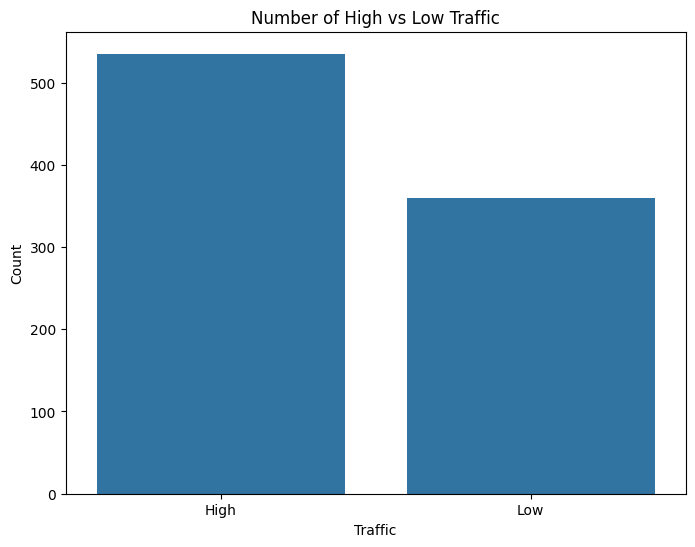

In [594]:
# Target Variable
# Number of High vs Low Traffic
plt.figure(figsize=(8, 6))
sns.countplot(x='high_traffic', data=df)
plt.title('Number of High vs Low Traffic')
plt.xlabel('Traffic')
plt.ylabel('Count')
plt.show()

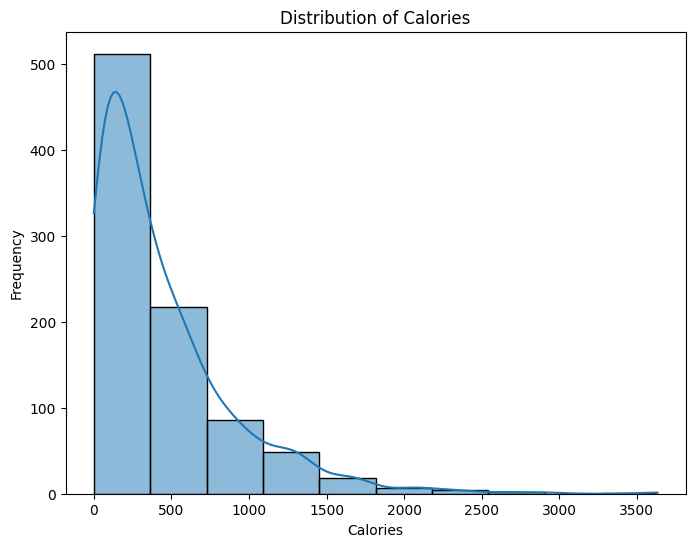

In [595]:
# Histogram showing the distribution of calories
plt.figure(figsize=(8, 6))
sns.histplot(df['calories'], bins=10, kde=True)
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

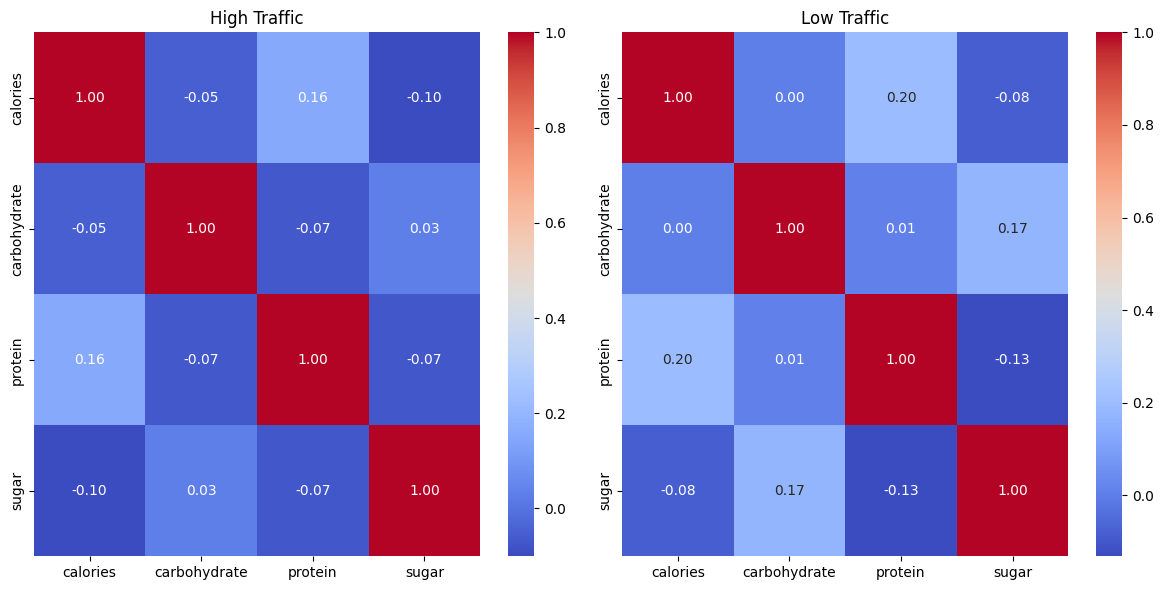

In [596]:
# Relationship between calories, carbohydrates, protein and sugar for High and Low traffic recipes

# Create correlation matrix for high traffic recipes
high_traffic_df = df[df['high_traffic'] == 'High']
correlation_matrix_high = high_traffic_df[['calories', 'carbohydrate', 'protein', 'sugar']].corr()

# Create correlation matrix for low traffic recipes
low_traffic_df = df[df['high_traffic'] == 'Low']
correlation_matrix_low = low_traffic_df[['calories', 'carbohydrate', 'protein', 'sugar']].corr()

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix_high, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('High Traffic')

plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix_low, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Low Traffic')

plt.tight_layout()
plt.show()


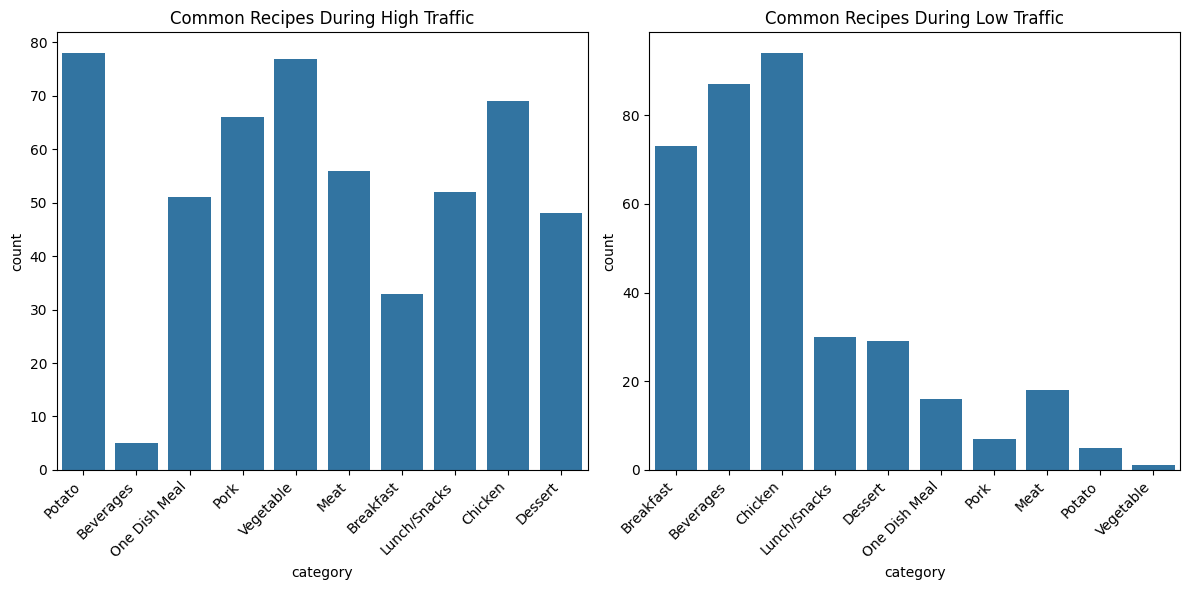

In [597]:
# Common recipe during high traffic and low traffic

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='category', data=high_traffic_df)
plt.title('Common Recipes During High Traffic')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability


plt.subplot(1, 2, 2)
sns.countplot(x='category', data=low_traffic_df)
plt.title('Common Recipes During Low Traffic')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


Model Fitting and Evaluation

Models:
1.   Logistic regression
2.   Random Forest



In [598]:
# Check if data is balanced or imbalanced inpercentages
df['high_traffic'].value_counts()

,count
high_traffic,
High,535
Low,360


([<matplotlib.patches.Wedge at 0x79a9872ed490>,
 [Text(-1.0485226820270106, -0.3325660615199398, 'High'),
  Text(1.0485226508899241, 0.33256615968971703, 'Low')],
 [Text(-0.571921462923824, -0.18139966991996712, '59.8%'),
  Text(0.5719214459399585, 0.18139972346711838, '40.2%')])

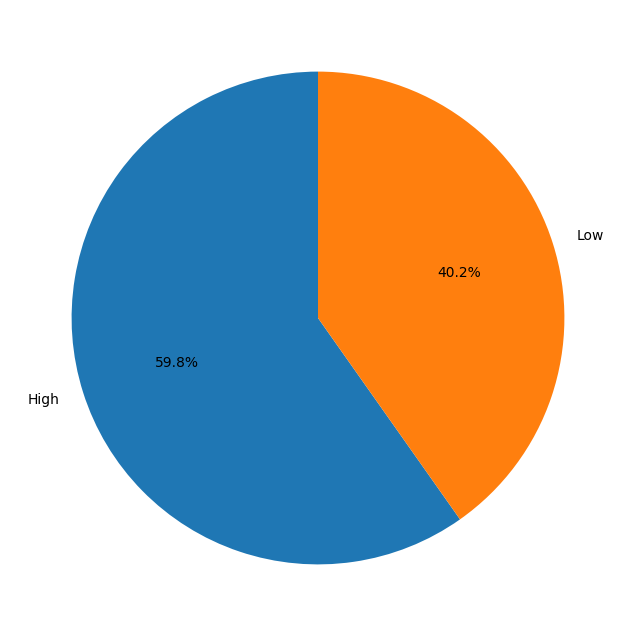

In [599]:
# Chech ratio for each DV's value
# Data is balanced - accuracy, precision, and recall evaluation techniques are used.
plt.figure(figsize=(8, 8))
plt.pie(df['high_traffic'].value_counts(), labels=df['high_traffic'].unique(), autopct='%1.1f%%', startangle=90)

Prepare Data for Modelling

In [600]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,Low
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,Low
5,6,691.15,3.46,1.65,53.93,One Dish Meal,2,High


In [601]:
df.dtypes

,0
recipe,int64
calories,float64
carbohydrate,float64
sugar,float64
protein,float64
category,object
servings,int64
high_traffic,object


In [602]:
# Encode category and high_traffic columns
label_encoder = LabelEncoder()
df['category'] = label_encoder.fit_transform(df['category'])
df['high_traffic'] = label_encoder.fit_transform(df['high_traffic'])

In [603]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
1,2,35.48,38.56,0.66,0.92,8,4,0
2,3,914.28,42.68,3.09,2.88,1,1,1
3,4,97.03,30.56,38.63,0.02,0,4,0
4,5,27.05,1.85,0.80,0.53,0,4,1
5,6,691.15,3.46,1.65,53.93,6,2,0


In [604]:
# Separate feature variable (calories, carbohydrate, sugar, protein, category, and servings) and target variable (high_traffic)
# Separate X and y
y = df['high_traffic']
X = df.drop(['recipe', 'high_traffic'], axis=1)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression Model

In [605]:
# Logistic regression
model=sm.Logit(y_train, X_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.510667
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           high_traffic   No. Observations:                  716
Model:                          Logit   Df Residuals:                      710
Method:                           MLE   Df Model:                            5
Date:                Mon, 10 Mar 2025   Pseudo R-squ.:                  0.2416
Time:                        08:50:30   Log-Likelihood:                -365.64
converged:                       True   LL-Null:                       -482.12
Covariance Type:            nonrobust   LLR p-value:                 2.479e-48
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
calories         0.0004      0.000      1.843      0.065   -2.27e-05       0.001
carbohydrate     0.0007

Logistic Regression Evaluation and Assessment

In [606]:
# Train logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", round(accuracy_score(y_test, y_pred),4))
print("Precision:", round(precision,4))
print("Recall:", round(recall,4))

Accuracy: 0.7709
Precision: 0.7286
Recall: 0.6986


Random Forest

Random Forest Evaluation

In [607]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
# Predict on test set
rf_y_pred = rf.predict(X_test)

# Calculate precision
precision = precision_score(y_test, rf_y_pred)

# Calculate recall
recall = recall_score(y_test, rf_y_pred)

# Print metrics
print("Accuracy:", round(accuracy_score(y_test, rf_y_pred),4))
print("Precision:", round(precision,4))
print("Recall:", round(recall,4))

Accuracy: 0.7151
Precision: 0.6571
Recall: 0.6301
